In [50]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from kmodes import kmodes
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import pandas as pd
import sklearn.cluster as skc
from scipy.spatial.distance import cdist
import sys

In [2]:
RANGE = 10

In [3]:
df = pd.read_csv('mission_1.csv')

data = []
for _, d in df.iterrows():
    data.append(d.tolist()[1:])
data = np.array(data)
np.random.shuffle(data)
test = data[-1:]
data = data[:-1]

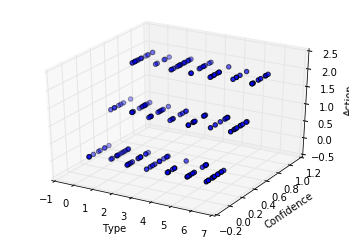

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='b', marker='o')
ax.set_xlabel('Type')
ax.set_ylabel('Confidence')
ax.set_zlabel('Action')

In [51]:
cluster_inertia = []
for k in xrange(1, RANGE):
    k_means_model = skc.KMeans(n_clusters=k).fit(data)
    cluster_inertia.append(k_means_model.inertia_)
    
print('K Values: ', cluster_inertia)

K Values:  [988.83444244836926, 360.3213330134239, 254.06478728866716, 195.63540314834785, 147.53221609851042, 124.88805869111826, 92.92268718827782, 79.030510886120695, 64.888925375307949]


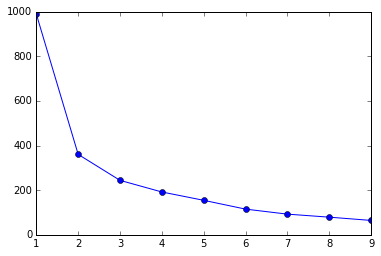

In [5]:
plt.plot(xrange(1, RANGE), cluster_inertia, marker='o')

In [101]:
#k_means_model = skc.KMeans(n_clusters=3).fit(data)
#k_means_model = skc.MiniBatchKMeans(n_clusters=3).fit(data)
#k_means_model = skc.AffinityPropagation(preference=-50).fit(data)
#bandwidth = skc.estimate_bandwidth(data, quantile=0.2, n_samples=50)
#k_means_model = skc.MeanShift(bandwidth=bandwidth, bin_seeding=True)
#k_means_model = skc.DBSCAN(eps=0.1, min_samples=10).fit(data)

centroids = k_means_model.cluster_centers_
labels = k_means_model.labels_

print(centroids)
print(labels)

[[ 0.52023121  0.47694929  0.95375723]
 [ 5.13299663  0.39109087  0.72053872]
 [ 2.58585859  0.54880242  1.17171717]]
[ 2 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1  0 -1 -1 -1  0  1 -1
  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1
  1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1
  3 -1 -1 -1 -1 -1 -1 -1  0  1 -1 -1 -1  3  1  2 -1 -1 -1  0 -1 -1 -1  3  0
 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1  1 -1  0 -1 -1 -1 -1 -1 -1  0  0  1 -1 -1
 -1  3  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  2  2 -1 -1  3 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  2 -1  2 -1  2 -1  1 -1 -1  0 -1 -1 -1
 -1  3 -1 -1 -1  2 -1]


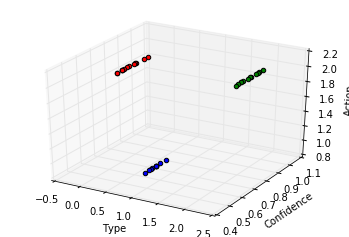

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in xrange(data.shape[0]):
    if labels[i] == 0:
        ax.scatter(data[i][0], data[i][1], data[i][2], c='r', marker='o')
    elif labels[i] == 1:
        ax.scatter(data[i][0], data[i][1], data[i][2], c='b', marker='o')
    elif labels[i] == 2:
        ax.scatter(data[i][0], data[i][1], data[i][2], c='g', marker='o')
ax.set_xlabel('Type')
ax.set_ylabel('Confidence')
ax.set_zlabel('Action')

In [7]:
centroid_shape = centroids.shape[0]

prototypes = np.zeros((centroid_shape, 2))

for i in xrange(centroid_shape):
    for j in xrange(labels.shape[0]):
        if labels[j] == i:
            dist = np.linalg.norm(centroids[i] - data[j])
            
            if not prototypes[i][1]:
                prototypes[i][0] = j
                prototypes[i][1] = dist
                continue
                
            if dist < prototypes[i][1]:
                prototypes[i][0] = j
                prototypes[i][1] = dist
                
prototypes

array([[  8.40000000e+01,   5.00249151e-01],
       [  1.79000000e+02,   1.26267808e-01],
       [  1.30000000e+01,   4.00001549e-01]])

In [8]:
for i in xrange(prototypes.shape[0]):
    print(data[int(prototypes[:, 0][i])])

[ 1.          0.48530192  1.        ]
[ 5.          0.44464411  1.        ]
[ 2.          0.49650559  1.        ]


### The robot [action] when presented with a [type] query with a confidence [confidence]%.
### Which action would you prefer for the robot to make next time:
### 1 - Same action
### 2, 3 - Next two

In [9]:
def display_question(survey):
    print(survey[-1])
    sys.stdout.write('The robot ')
    if int(survey[-1]) == 0:
        sys.stdout.write('was fully autonomous')
    elif int(survey[-1]) == 1:
        sys.stdout.write('stopped and waited for your input')
    elif int(survey[-1]) == 2:
        sys.stdout.write('continued its task and asked for your answer later')

    sys.stdout.write(' when presented with a ')

    if int(survey[0]) == 0:
        sys.stdout.write('visual')
    elif int(survey[0]) == 1:
        sys.stdout.write('tagging')
    elif int(survey[0]) == 2:
        sys.stdout.write('path')
    elif int(survey[0]) == 3:
        sys.stdout.write('communication')
    elif int(survey[0]) == 4:
        sys.stdout.write('robot health')
    elif int(survey[0]) == 5:
        sys.stdout.write('audio')
    elif int(survey[0]) == 6:
        sys.stdout.write('task')

    sys.stdout.write(' query with a confidence of ')

    sys.stdout.write('{}%\n'.format(int(survey[1]*100)))

In [10]:
def survey_func(survey):
    display_question(survey)
    
    sys.stdout.write('Which action would you prefer for the robot to make next time:\n')
    sys.stdout.write('1 - Same action\n')
    if int(survey[-1]) == 0:
        sys.stdout.write('2 - Stop and ask\n')
        sys.stdout.write('3 - Continue but still ask\n')
        
        result = input()
        if result == 1:
            return 0
        elif result == 2:
            return 1
        elif result == 3:
            return 2
    elif int(survey[-1]) == 1:
        sys.stdout.write('2 - Fully autonomous\n')
        sys.stdout.write('3 - Continue but still ask\n')
        
        result = input()
        if result == 1:
            return 1
        elif result == 2:
            return 0
        elif result == 3:
            return 2
    elif int(survey[-1]) == 2:
        sys.stdout.write('2 - Fully autonomous\n')
        sys.stdout.write('3 - Stop and ask\n')
        
        result = input()
        if result == 1:
            return 2
        elif result == 2:
            return 0
        elif result == 3:
            return 1

In [11]:
cluster_labels = dict()
for p in prototypes[:, 0]:
    preferred_action = survey_func(data[int(p)])
    cluster_labels[labels[int(p)]] = preferred_action

1.0
The robot stopped and waited for your input when presented with a tagging query with a confidence of 48%
Which action would you prefer for the robot to make next time:
1 - Same action
2 - Fully autonomous
3 - Continue but still ask
3
1.0
The robot stopped and waited for your input when presented with a audio query with a confidence of 44%
Which action would you prefer for the robot to make next time:
1 - Same action
2 - Fully autonomous
3 - Continue but still ask
2
1.0
The robot stopped and waited for your input when presented with a path query with a confidence of 49%
Which action would you prefer for the robot to make next time:
1 - Same action
2 - Fully autonomous
3 - Continue but still ask
1


In [12]:
cluster_labels

{0: 2, 1: 0, 2: 1}

In [13]:
for t in test:
    c_predict = k_means_model.predict([t])[0]
    action = cluster_labels[c_predict]
    if t[-1] != action:
        print('Before:')
        display_question(t)
        t[-1] = action
        print('After:')
        display_question(t)
        print()

Before:
0.0
The robot was fully autonomous when presented with a path query with a confidence of 27%
After:
1.0
The robot stopped and waited for your input when presented with a path query with a confidence of 27%



colors = ["g.", "r.", "c.", "y."]

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], colors[labels[i]], markersize=10)

plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=100, linewidths=1, zorder=10)